# The cost of solving linear equation
이번 실습은 matrix size가 커짐에 따라 elimination에 필요한 연산시간이 어떻게 변하는 지를 살펴 보겠습니다. 또한, GPU의 활용이 큰 matrix 연산에 도움을 주는 것을 실습을 통해 확인해 보겠습니다.

In [4]:
import numpy as np
import cupy as cp
import time

- chapter 2에서 우리는 determinant A가 0이 아닌 matrix A에 대해서 elimination method를 이용하여 upper triangular matrix를 만들어 Ax = b 를 풀 수 있음을 확인하였습니다. 수업에서는 2x2, 3x3 matrix들을 다루었지만, 좀 더 큰 matrix를 살펴보겠습니다.

In [2]:
n=8
A = np.random.randint(-10,10,size=(n,n))
print('A=\n',A)
print('\n det(A)=',np.linalg.det(A))

B = np.random.randint(-10,10,size=(n,n))
B[1,:]=B[0,:]*2
print('B=\n',B)
print('\n det(B)=',np.linalg.det(B))

A=
 [[ -1   5  -3   2 -10  -5   2   7]
 [  7  -3   0   1   9 -10   6  -1]
 [ -3  -4   3  -4   7  -8  -7   1]
 [  9   4  -5  -1  -6   5   0   8]
 [ -3  -7  -5  -2  -6   3  -9  -7]
 [ -6  -1   3  -8   0   7   2  -7]
 [ -5  -9  -1   1   2  -4 -10   8]
 [  0   7   4   1   5  -2   2  -8]]

 det(A)= 39147547.99999993
B=
 [[ -6  -3  -6   5   0  -7   1   6]
 [-12  -6 -12  10   0 -14   2  12]
 [ -8  -6  -2   8   7   1  -6   1]
 [ -7   9  -8  -8 -10   8  -3  -8]
 [ -1   0  -1   7 -10   5  -9  -5]
 [  5 -10   2  -3   1   0  -4   3]
 [ -1   6  -4   8   1   9  -8  -2]
 [ -3   5  -5   6   8   1 -10   8]]

 det(B)= 0.0


- B는 determinant가 0이므로 singular matrix입니다. singular matrix B에 대해서는 linalg.solve가 solution을 줄 수 없습니다.

In [3]:
x = np.linalg.solve(A,np.random.randint(-10,10,size=(n,1)))
print('solution of Ax = b: \n',x)

x = np.linalg.solve(B,np.random.randint(-10,10,size=(n,1)))
print('solution of Bx = b: \n',x)


solution of Ax = b: 
 [[-3.48114922]
 [ 3.07758918]
 [-9.29431667]
 [-1.32095604]
 [ 4.49437405]
 [ 0.25355892]
 [ 0.95812131]
 [-0.25926293]]


LinAlgError: ignored

- 아래는 numpy가 아닌 cupy로 같은 matrix를 생성해 보겠습니다. cupy는 GPU를 이용해 numpy 연산을 할 수 있게 해 줍니다. NVIDIA GPU의 CUDA를 통해 연산속도를 빠르게 하기 때문에 cupy로 이름지어졌습니다.

In [4]:
n=8
Ac = cp.random.randint(-10,10,size=(n,n))
print('A=\n',Ac)
print('\n det(A)=',np.linalg.det(Ac))

Bc = cp.random.randint(-10,10,size=(n,n))
Bc[1,:]=Bc[0,:]*2
print('B=\n',Bc)
print('\n det(B)=',np.linalg.det(Bc))

A=
 [[-5  9  6  7  3  9 -8  7]
 [ 3  8  8 -4  6  3  6  2]
 [ 3 -2 -6  9 -8  6  2 -1]
 [ 0 -1 -9  6 -5 -1  3 -8]
 [ 0 -2 -7  2 -6  9 -3 -6]
 [-4 -6  2  1  0 -1  1  5]
 [ 5  8  9 -9 -6  5  3 -4]
 [ 2 -2  4 -5 -5  4  8  1]]

 det(A)= 26033795.000000004
B=
 [[  5  -2  -1   0   2   6   9   8]
 [ 10  -4  -2   0   4  12  18  16]
 [  5   1  -9   0  -4  -4  -2   4]
 [ -3  -1   9  -9   2   3  -6   5]
 [  8  -7   2  -8   5   5   4  -6]
 [-10  -4   1  -1   5  -7  -5  -6]
 [  7  -5  -7   6  -9   2   9  -9]
 [ -8   8   6   6  -6  -1  -2  -4]]

 det(B)= 0.0


- 먼저 GPU를 활용하지 않는 numpy로 큰 matrix에 대한 연산속도를 확인해 보겠습니다.

In [5]:
N=5000
print(N,'x',N,' matrix:')
A = np.random.randint(-10,10,size=(N,N))
b = np.random.randint(-10,10,size=(N,N))
#print('[A b] = \n',np.concatenate((A,b),axis=1))
#print('\ndet(A)=',np.linalg.det(A))

s0 = time.time()
x=np.linalg.solve(A,b)
solve_time=time.time() -s0
print('computation time = ',solve_time,' sec')

5000 x 5000  matrix:
computation time =  10.374380111694336  sec


- 다음은 같은 size의 큰 matrix를 cupy로 연산해 속도를 측정해 보겠습니다.

In [6]:
N=5000
print(N,'x',N,' matrix:')
Ac = cp.random.randint(-10,10,size=(N,N))
bc = cp.random.randint(-10,10,size=(N,N))
#print('[A b] = \n',np.concatenate((A,b),axis=1))
#print('\ndet(A)=',np.linalg.det(A))

s0 = time.time()
xc=cp.linalg.solve(Ac,bc)
solve_time=time.time() -s0
print('computation time = ',solve_time,' sec')

5000 x 5000  matrix:
computation time =  0.42931032180786133  sec


- 여러 matrix size에 대해 연산을 수행해 비교해보고자 1부터 10000까지의 숫자를 log scale로 생성해보려고 합니다. linspace와 logspace의 결과를 비교해 봅시다. np.int16은 floating number를 integer로 변환해 줍니다. 

In [7]:
mat_size_lin=np.linspace(1,10000,num=7)
print('linear scale: \n', mat_size_lin, '\n')
print('linear scale: \n', np.int16(mat_size_lin), '\n')

mat_size_log=np.logspace(0,4,num=8)
print('log scale: \n', np.int16(mat_size_log))

linear scale: 
 [1.0000e+00 1.6675e+03 3.3340e+03 5.0005e+03 6.6670e+03 8.3335e+03
 1.0000e+04] 

linear scale: 
 [    1  1667  3334  5000  6667  8333 10000] 

log scale: 
 [    1     3    13    51   193   719  2682 10000]


- 아래에서 nn은 1에서 10000까지 logscale로 몇 개의 숫자를 생성할 지 정합니다. mm은 특정 size의 matrix에 대해 몇 번 연산을 반복할 지 정합니다. 1번 측정하는 것은 에러가 있어 보통 이러한 시뮬레이션은 많은 수의 반복측정에 대한 평균을 구합니다. 그러나, 여기서는 5번 정도만 해보겠습니다. 먼저 numpy의 경우입니다.

In [8]:
nn = 10
mm = 5
solve_time=np.zeros((nn,mm))
mat_size=np.int16(np.logspace(1,4,num=nn))
for n in range(0,nn):
  N = mat_size[n]
  print('size: ',N)
  flag_detA=0
  for m in range(mm):
    while flag_detA==0:
      A = np.random.randint(-10,10,size=(N,N))
      if np.linalg.det(A)!=0:
        flag_detA=1
    b = np.random.randint(-10,10,size=(N,1))
    s0 = time.time()
    np.linalg.solve(A,b)
    solve_time[n,m]=time.time() -s0
  print(np.mean(solve_time[n,:]),'sec')

size:  10
3.871917724609375e-05 sec
size:  21
5.173683166503906e-05 sec
size:  46
8.358955383300782e-05 sec
size:  100
0.00022830963134765626 sec
size:  215
0.00122528076171875 sec
size:  464
0.006574773788452148 sec
size:  1000


/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


0.03726162910461426 sec
size:  2154
0.2607573986053467 sec
size:  4641
2.2285697937011717 sec
size:  10000
20.12738013267517 sec


- 같은 과정을 GPU를 사용하는 cupy로 연산합니다.

In [9]:
nn = 10
mm = 5
solve_time_cuda=cp.zeros((nn,mm))
for n in range(0,nn):
  N = mat_size[n]
  print('size: ',N)
  flag_detA=0
  for m in range(mm):
    while flag_detA==0:
      A = cp.random.randint(-10,10,size=(N,N))
      if cp.linalg.det(A)!=0:
        flag_detA=1
    b = cp.random.randint(-10,10,size=(N,1))
    s0 = time.time()
    cp.linalg.solve(A,b)
    solve_time_cuda[n,m]=time.time() -s0
  print(cp.mean(solve_time[n,:]),'sec')

size:  10
3.871917724609375e-05 sec
size:  21
5.173683166503906e-05 sec
size:  46
8.358955383300782e-05 sec
size:  100
0.00022830963134765626 sec
size:  215
0.00122528076171875 sec
size:  464
0.006574773788452148 sec
size:  1000
0.03726162910461426 sec
size:  2154
0.2607573986053467 sec
size:  4641
2.2285697937011717 sec
size:  10000
20.12738013267517 sec


- numpy와 cupy로 수행한 결과를 plot하여 비교해 봅시다.

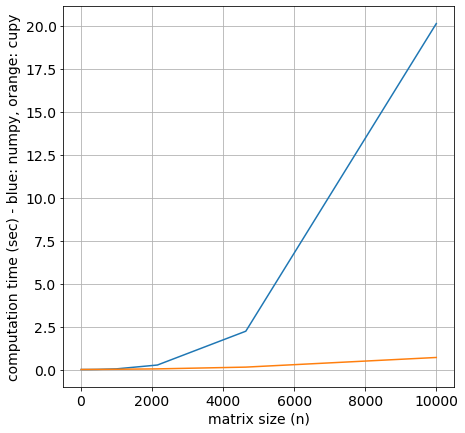

In [10]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(7,7)
plt.rcParams.update({'font.size':14})
plt.figure()
ax=plt.gca()
ax.plot(mat_size,solve_time.mean(axis=1))
ax.plot(mat_size,cp.asnumpy(solve_time_cuda.mean(axis=1)))

ax.set_xlabel('matrix size (n)')
ax.set_ylabel('computation time (sec) - blue: numpy, orange: cupy')
ax.grid('both')

# Gauss-Jordan Elimination


In [46]:
A = np.array([ [2,3], [4,7] ])
I = np.identity(2)
Ag = np.concatenate((A,I),axis=1)
Ag

array([[2., 3., 1., 0.],
       [4., 7., 0., 1.]])

In [47]:
# step 1. A -> U
Ag[1,:] = -2*Ag[0,:] + Ag[1,:] 
Ag

array([[ 2.,  3.,  1.,  0.],
       [ 0.,  1., -2.,  1.]])

In [48]:
# step 2. U -> D
Ag[0,:] = -3*Ag[1,:] + Ag[0,:]
Ag

array([[ 2.,  0.,  7., -3.],
       [ 0.,  1., -2.,  1.]])

In [49]:
# step 3. D -> I
Ag[0,:] = 0.5*Ag[0,:]
Ag

array([[ 1. ,  0. ,  3.5, -1.5],
       [ 0. ,  1. , -2. ,  1. ]])

# Elimination = Factorization

- 이번에는 Factorization, PA=LU를 python을 이용해 수행해 보겠습니다.
- scipy라는 numpy와 함께 널리 쓰이는 python package를 불러올 것입니다. scipy도 linear algebra와 관련된 유용한 함수들을 포함하고 있습니다. 아래의 링크를 참고해 주세요.
- https://docs.scipy.org/doc/scipy-0.14.0/reference/linalg.html

In [7]:
import scipy.linalg as la

- 다음과 같은 3 x 3 matrix A를 선언하여 P, L, U 를 구해 보겠습니다. 직접 손으로 풀어본 후에 실습을 진행하기를 권장합니다.

In [19]:
A = np.array([[0,1,1],[1,2,1],[2,7,9]])
print('A = \n',A)

A = 
 [[0 1 1]
 [1 2 1]
 [2 7 9]]


- .lu라는 함수에 A를 넣음으로 P, L, U를 각각 얻을 수 있습니다.

In [21]:
P,L,U = la.lu(A)
print('P = \n',P)
print('L = \n',L)
print('U = \n',U)

print('inv(L) = \n',np.linalg.inv(L))

P = 
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
L = 
 [[ 1.          0.          0.        ]
 [ 0.5         1.          0.        ]
 [ 0.         -0.66666667  1.        ]]
U = 
 [[ 2.          7.          9.        ]
 [ 0.         -1.5        -3.5       ]
 [ 0.          0.         -1.33333333]]
inv(L) = 
 [[ 1.          0.          0.        ]
 [-0.5         1.          0.        ]
 [-0.33333333  0.66666667  1.        ]]


- PA와 LU가 같은 값을 출력하는지 확인해 봅니다.

In [22]:
print('PA = \n',np.dot(P,A))
print('LU = \n',np.matmul(L,U))

PA = 
 [[2. 7. 9.]
 [1. 2. 1.]
 [0. 1. 1.]]
LU = 
 [[2. 7. 9.]
 [1. 2. 1.]
 [0. 1. 1.]]


- Permutation matrix의 transpose matrix와 inverse matrix를 numpy를 이용해 구해봅니다.

In [15]:
Pt = np.transpose(P)
print('transpose of P = \n',Pt)
Pinv = np.linalg.inv(P)
print('inverse of P = \n',Pinv)

transpose of P = 
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
inverse of P = 
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


- permutation matrix를 한 번 곱했을 때, 두 번 곱했을 때의 결과를 확인해 봅니다.

In [16]:
print('PA = \n',np.matmul(P,A))
print('PPA = \n',np.matmul(P,np.matmul(P,A)))

PA = 
 [[2. 7. 9.]
 [1. 2. 1.]
 [0. 1. 1.]]
PPA = 
 [[0. 1. 1.]
 [1. 2. 1.]
 [2. 7. 9.]]
